In [1]:
#Importing the necessary Libraries 
import pandas as pd 
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from pandas.api.types import is_numeric_dtype
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import shap
from sklearn.linear_model import LinearRegression

In [2]:
#Reading and inspectioning data
df=pd.read_csv('./GlobalWeatherRepository.csv')
df.head()

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1715849100,2024-05-16 13:15,26.6,79.8,Partly Cloudy,...,8.4,26.6,1,1,04:50 AM,06:50 PM,12:12 PM,01:11 AM,Waxing Gibbous,55
1,Albania,Tirana,41.33,19.82,Europe/Tirane,1715849100,2024-05-16 10:45,19.0,66.2,Partly cloudy,...,1.1,2.0,1,1,05:21 AM,07:54 PM,12:58 PM,02:14 AM,Waxing Gibbous,55
2,Algeria,Algiers,36.76,3.05,Africa/Algiers,1715849100,2024-05-16 09:45,23.0,73.4,Sunny,...,10.4,18.4,1,1,05:40 AM,07:50 PM,01:15 PM,02:14 AM,Waxing Gibbous,55
3,Andorra,Andorra La Vella,42.50,1.52,Europe/Andorra,1715849100,2024-05-16 10:45,6.3,43.3,Light drizzle,...,0.7,0.9,1,1,06:31 AM,09:11 PM,02:12 PM,03:31 AM,Waxing Gibbous,55
4,Angola,Luanda,-8.84,13.23,Africa/Luanda,1715849100,2024-05-16 09:45,26.0,78.8,Partly cloudy,...,183.4,262.3,5,10,06:12 AM,05:55 PM,01:17 PM,12:38 AM,Waxing Gibbous,55


In [3]:
#count of records
len(df)

59633

In [4]:
#Verifying columns
df.columns

Index(['country', 'location_name', 'latitude', 'longitude', 'timezone',
       'last_updated_epoch', 'last_updated', 'temperature_celsius',
       'temperature_fahrenheit', 'condition_text', 'wind_mph', 'wind_kph',
       'wind_degree', 'wind_direction', 'pressure_mb', 'pressure_in',
       'precip_mm', 'precip_in', 'humidity', 'cloud', 'feels_like_celsius',
       'feels_like_fahrenheit', 'visibility_km', 'visibility_miles',
       'uv_index', 'gust_mph', 'gust_kph', 'air_quality_Carbon_Monoxide',
       'air_quality_Ozone', 'air_quality_Nitrogen_dioxide',
       'air_quality_Sulphur_dioxide', 'air_quality_PM2.5', 'air_quality_PM10',
       'air_quality_us-epa-index', 'air_quality_gb-defra-index', 'sunrise',
       'sunset', 'moonrise', 'moonset', 'moon_phase', 'moon_illumination'],
      dtype='object')

In [5]:
#Verifying types
df.dtypes

country                          object
location_name                    object
latitude                        float64
longitude                       float64
timezone                         object
last_updated_epoch                int64
last_updated                     object
temperature_celsius             float64
temperature_fahrenheit          float64
condition_text                   object
wind_mph                        float64
wind_kph                        float64
wind_degree                       int64
wind_direction                   object
pressure_mb                     float64
pressure_in                     float64
precip_mm                       float64
precip_in                       float64
humidity                          int64
cloud                             int64
feels_like_celsius              float64
feels_like_fahrenheit           float64
visibility_km                   float64
visibility_miles                float64
uv_index                        float64


In [6]:
#Localizing Null values
df.isnull().sum()

country                         0
location_name                   0
latitude                        0
longitude                       0
timezone                        0
last_updated_epoch              0
last_updated                    0
temperature_celsius             0
temperature_fahrenheit          0
condition_text                  0
wind_mph                        0
wind_kph                        0
wind_degree                     0
wind_direction                  0
pressure_mb                     0
pressure_in                     0
precip_mm                       0
precip_in                       0
humidity                        0
cloud                           0
feels_like_celsius              0
feels_like_fahrenheit           0
visibility_km                   0
visibility_miles                0
uv_index                        0
gust_mph                        0
gust_kph                        0
air_quality_Carbon_Monoxide     0
air_quality_Ozone               0
air_quality_Ni

In [7]:
#Observing Object string values
df[['sunrise','sunset','moonrise','moonset','moon_phase']]

,sunrise,sunset,moonrise,moonset,moon_phase
0,04:50 AM,06:50 PM,12:12 PM,01:11 AM,Waxing Gibbous
1,05:21 AM,07:54 PM,12:58 PM,02:14 AM,Waxing Gibbous
2,05:40 AM,07:50 PM,01:15 PM,02:14 AM,Waxing Gibbous
3,06:31 AM,09:11 PM,02:12 PM,03:31 AM,Waxing Gibbous
4,06:12 AM,05:55 PM,01:17 PM,12:38 AM,Waxing Gibbous
...,...,...,...,...,...
59628,06:32 AM,06:38 PM,10:58 PM,09:52 AM,Waning Gibbous
59629,06:02 AM,06:07 PM,10:24 PM,08:41 AM,Waning Gibbous
59630,06:08 AM,06:14 PM,10:27 PM,09:05 AM,Waning Gibbous
59631,06:11 AM,06:18 PM,09:34 PM,10:06 AM,Waning Gibbous


In [8]:
df=df.drop('last_updated_epoch', axis=1)

In [9]:
#Calculating Important Measures for each numeric column

# Getting IQR and Zscore to provide automatic detection of outliers
stats_df=pd.DataFrame({'Measure':['Mean','Median','Std','Min','Max','Range','IQR', 'Outliers-IQR', 'Outliers-ZScore']})
for i in df.columns:
    
    #only numeric columns
    if is_numeric_dtype(df[i]):
        
        Q3= df[i].quantile(0.75)
        Q1= df[i].quantile(0.25)
        IQR= Q3 - Q1
        
        #Calculating ZScore
        df['Zscore']=np.abs(stats.zscore(df[i]))
        
        #Calculating Upper Fence and Lower Fence for IQR Outliers and getting outliers
        iqr_out=df[ (df[i] < Q1 - (1.5 * IQR)) |  (df[i] > Q3 + (1.5 * IQR))]

        #Getting Outliers ZScore based on 3 std away from the mean
        zcore_out=df[df['Zscore']>3]

        # Calculating Masures
        stats_df[i]=[df[i].mean(),
                     df[i].median(),
                     df[i].std(),
                     df[i].min(),
                     df[i].max(),
                     df[i].max() - df[i].min(),
                     IQR,
                     len(iqr_out[i]),
                     len(zcore_out[i])
                    ]
        print("Outliers IQR based:" + i )
        print (iqr_out[i])
        print("")
        print("Outliers ZScore based:" + i )
        print (zcore_out[i])
        print("")
        
    
    
    
    
    

Outliers IQR based:latitude
Series([], Name: latitude, dtype: float64)

Outliers ZScore based:latitude
Series([], Name: latitude, dtype: float64)

Outliers IQR based:longitude
8        149.2200
58       178.4200
85       139.6900
89       169.5300
107      171.3800
           ...   
59597    159.9500
59614   -175.2000
59619    179.2167
59624   -123.0439
59627    168.3167
Name: longitude, Length: 4588, dtype: float64

Outliers ZScore based:longitude
Series([], Name: longitude, dtype: float64)

Outliers IQR based:temperature_celsius
784      -1.0
3010     45.6
3205     45.7
4373     45.9
4568     46.6
         ... 
59147    -1.7
59191    -2.9
59246    -0.1
59275    -5.7
59441    -2.0
Name: temperature_celsius, Length: 1389, dtype: float64

Outliers ZScore based:temperature_celsius
29235    -8.4
29820    -7.9
30600   -10.4
32884   -11.0
33079   -12.1
         ... 
57133    -7.6
57328    -7.8
57577    -7.6
58495    -7.5
58661    -8.0
Name: temperature_celsius, Length: 306, dtype: float64



In [90]:
stats_df.style

,Measure,latitude,longitude,temperature_celsius,temperature_fahrenheit,wind_mph,wind_kph,wind_degree,pressure_mb,pressure_in,precip_mm,precip_in,humidity,cloud,feels_like_celsius,feels_like_fahrenheit,visibility_km,visibility_miles,uv_index,gust_mph,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,moon_illumination
0,Mean,19.136467,22.184190,22.179201,71.924168,8.281012,13.330941,169.178173,1014.149699,29.947229,0.140739,0.005351,63.675012,40.115171,23.096641,73.567764,9.586732,5.673989,4.042753,11.877103,19.116273,528.315742,63.505259,15.084155,11.399945,25.432175,51.032047,1.724683,2.702665,50.044288
1,Median,17.250000,23.316700,25.000000,77.000000,6.900000,11.200000,160.000000,1013.000000,29.920000,0.000000,0.000000,69.000000,31.000000,26.000000,78.700000,10.000000,6.000000,3.800000,10.300000,16.600000,325.600000,60.800000,3.330000,2.300000,13.600000,20.720000,1.000000,2.000000,50.000000
2,Std,24.475998,65.814120,9.639296,17.350554,9.247763,14.881055,103.709219,13.583335,0.401096,0.609214,0.024069,24.439987,33.924681,11.468038,20.640286,2.536560,1.579075,3.591952,10.393933,16.727774,944.253028,36.250003,26.390336,48.804273,44.642072,157.273795,0.991697,2.591416,35.151761
3,Min,-41.300000,-175.200000,-24.900000,-12.800000,2.200000,3.600000,1.000000,947.000000,27.960000,0.000000,0.000000,2.000000,0.000000,-35.600000,-32.100000,0.000000,0.000000,0.000000,2.200000,3.600000,-9999.000000,0.000000,0.000000,-9999.000000,0.185000,-1848.150000,1.000000,1.000000,0.000000
4,Max,64.150000,179.220000,49.200000,120.600000,1841.200000,2963.200000,360.000000,3006.000000,88.770000,42.240000,1.660000,100.000000,100.000000,51.200000,124.200000,32.000000,19.000000,16.300000,1845.700000,2970.400000,38879.398000,480.700000,427.700000,521.330000,1614.100000,6037.290000,6.000000,10.000000,100.000000
5,Range,105.450000,354.420000,74.100000,133.400000,1839.000000,2959.600000,359.000000,2059.000000,60.810000,42.240000,1.660000,98.000000,100.000000,86.800000,156.300000,32.000000,19.000000,16.300000,1843.500000,2966.800000,48878.398000,480.700000,427.700000,10520.330000,1613.915000,7885.440000,5.000000,9.000000,100.000000
6,IQR,36.650000,57.416100,11.400000,20.600000,7.400000,11.900000,177.000000,8.000000,0.220000,0.030000,0.000000,37.000000,72.000000,13.900000,25.000000,0.000000,0.000000,6.200000,9.100000,14.700000,279.900000,44.000000,15.540000,8.140000,24.100000,36.895000,1.000000,2.000000,70.000000
7,Outliers-IQR,0.000000,4588.000000,1389.000000,1369.000000,890.000000,890.000000,0.000000,2302.000000,3365.000000,11167.000000,9371.000000,0.000000,0.000000,1311.000000,1325.000000,11632.000000,11541.000000,0.000000,1365.000000,1347.000000,5220.000000,1270.000000,7474.000000,8433.000000,4665.000000,6001.000000,4726.000000,6563.000000,0.000000
8,Outliers-ZScore,0.000000,0.000000,306.000000,306.000000,40.000000,41.000000,0.000000,12.000000,12.000000,762.000000,807.000000,0.000000,0.000000,314.000000,315.000000,1620.000000,1585.000000,189.000000,128.000000,128.000000,761.000000,596.000000,1501.000000,354.000000,758.000000,609.000000,851.000000,0.000000,0.000000


In [91]:
#Scaling and Adding some columns
scaler=MinMaxScaler()

#Transform 'last_updated' to datetime
df['last_updated']=pd.to_datetime(df['last_updated'])

# Getting date time columns
df['year']=df['last_updated'].dt.year
df['month']=df['last_updated'].dt.month
df['day']=df['last_updated'].dt.day
df['weekday']=df['last_updated'].dt.day_name()
df['hour']=df['last_updated'].dt.hour

# Transforming Month and Hour to catch the cyclic relationship between hours
df['Hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24)
df['Hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24)
df['Month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
df['Month_cos'] = np.cos(2 * np.pi * df['month'] / 12)



#Columns to scale
columns = stats_df.columns[1:].tolist()
columns.append('Hour_sin')
columns.append('Hour_cos')
columns.append('Month_sin')
columns.append('Month_cos')

#Scaling values
df_numeric_normalized = pd.DataFrame(scaler.fit_transform(df[columns]), columns=columns)

df_numeric_normalized

,latitude,longitude,temperature_celsius,temperature_fahrenheit,wind_mph,wind_kph,wind_degree,pressure_mb,pressure_in,precip_mm,...,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,moon_illumination,Hour_sin,Hour_cos,Month_sin,Month_cos
0,0.719014,0.689521,0.695007,0.694153,0.003317,0.003277,0.938719,0.031569,0.031738,0.000000,...,0.950464,0.005090,0.237748,0.0,0.000000,0.55,0.370590,0.017037,0.75,0.066987
1,0.783594,0.550251,0.592443,0.592204,0.002556,0.002568,0.888579,0.031569,0.031574,0.002367,...,0.950455,0.000567,0.234629,0.0,0.000000,0.55,0.750000,0.066987,0.75,0.066987
2,0.740256,0.502934,0.646424,0.646177,0.003915,0.003886,0.777159,0.031083,0.031080,0.000000,...,0.951719,0.006329,0.236708,0.0,0.000000,0.55,0.853553,0.146447,0.75,0.066987
3,0.794689,0.498617,0.421053,0.420540,0.002828,0.002804,0.596100,0.029140,0.029436,0.007102,...,0.950464,0.000319,0.234489,0.0,0.000000,0.55,0.750000,0.066987,0.75,0.066987
4,0.307824,0.531657,0.686910,0.686657,0.003208,0.003176,0.415042,0.031083,0.031080,0.000000,...,0.953440,0.113522,0.267639,0.8,1.000000,0.55,0.853553,0.146447,0.75,0.066987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59628,0.491228,0.305523,0.676113,0.676162,0.000000,0.000000,0.136490,0.032054,0.032067,0.019886,...,0.950727,0.010890,0.237355,0.2,0.111111,0.80,0.982963,0.629410,1.00,0.500000
59629,0.591117,0.792986,0.636977,0.636432,0.002828,0.002804,0.977716,0.036911,0.037000,0.000000,...,0.953241,0.022123,0.239771,0.2,0.222222,0.83,0.066987,0.250000,1.00,0.500000
59630,0.537266,0.619058,0.632928,0.631934,0.000272,0.000237,0.529248,0.033511,0.033547,0.000000,...,0.950498,0.017767,0.256381,0.2,0.222222,0.82,0.500000,0.000000,1.00,0.500000
59631,0.245456,0.574130,0.636977,0.637181,0.004296,0.004257,0.225627,0.033997,0.034205,0.000237,...,0.950516,0.003324,0.235220,0.0,0.000000,0.82,0.629410,0.017037,1.00,0.500000


In [92]:
#Combining Categorical and Numerical columns
df_scaled = df.select_dtypes(exclude=['number'])
df_scaled[columns]= df_numeric_normalized
df_scaled

,country,location_name,timezone,last_updated,condition_text,wind_direction,sunrise,sunset,moonrise,moonset,...,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,moon_illumination,Hour_sin,Hour_cos,Month_sin,Month_cos
0,Afghanistan,Kabul,Asia/Kabul,2024-05-16 13:15:00,Partly Cloudy,NNW,04:50 AM,06:50 PM,12:12 PM,01:11 AM,...,0.950464,0.005090,0.237748,0.0,0.000000,0.55,0.370590,0.017037,0.75,0.066987
1,Albania,Tirana,Europe/Tirane,2024-05-16 10:45:00,Partly cloudy,NW,05:21 AM,07:54 PM,12:58 PM,02:14 AM,...,0.950455,0.000567,0.234629,0.0,0.000000,0.55,0.750000,0.066987,0.75,0.066987
2,Algeria,Algiers,Africa/Algiers,2024-05-16 09:45:00,Sunny,W,05:40 AM,07:50 PM,01:15 PM,02:14 AM,...,0.951719,0.006329,0.236708,0.0,0.000000,0.55,0.853553,0.146447,0.75,0.066987
3,Andorra,Andorra La Vella,Europe/Andorra,2024-05-16 10:45:00,Light drizzle,SW,06:31 AM,09:11 PM,02:12 PM,03:31 AM,...,0.950464,0.000319,0.234489,0.0,0.000000,0.55,0.750000,0.066987,0.75,0.066987
4,Angola,Luanda,Africa/Luanda,2024-05-16 09:45:00,Partly cloudy,SSE,06:12 AM,05:55 PM,01:17 PM,12:38 AM,...,0.953440,0.113522,0.267639,0.8,1.000000,0.55,0.853553,0.146447,0.75,0.066987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59628,Venezuela,Caracas,America/Caracas,2025-03-19 05:30:00,Clear,NE,06:32 AM,06:38 PM,10:58 PM,09:52 AM,...,0.950727,0.010890,0.237355,0.2,0.111111,0.80,0.982963,0.629410,1.00,0.500000
59629,Vietnam,Hanoi,Asia/Bangkok,2025-03-19 16:30:00,Sunny,N,06:02 AM,06:07 PM,10:24 PM,08:41 AM,...,0.953241,0.022123,0.239771,0.2,0.222222,0.83,0.066987,0.250000,1.00,0.500000
59630,Yemen,Sanaa,Asia/Aden,2025-03-19 12:45:00,Sunny,SSW,06:08 AM,06:14 PM,10:27 PM,09:05 AM,...,0.950498,0.017767,0.256381,0.2,0.222222,0.82,0.500000,0.000000,1.00,0.500000
59631,Zambia,Lusaka,Africa/Lusaka,2025-03-19 11:45:00,Patchy rain nearby,E,06:11 AM,06:18 PM,09:34 PM,10:06 AM,...,0.950516,0.003324,0.235220,0.0,0.000000,0.82,0.629410,0.017037,1.00,0.500000


In [93]:
#Parsing Hour of the day for sunrise

df_scaled['split1']=df_scaled['sunrise'].str[:2]
df_scaled['split2']=df_scaled['sunrise'].str[-2:]
df_scaled['sunrise']=df_scaled.apply(lambda x: np.nan if not x['split1'].isnumeric() else 
                                                                                (int(x['split1']) if x['split2']=='AM' and int(x['split1'])!=12 else
                                                                                              (0 if x['split2']=='AM' and int(x['split1'])==12 else
                                                                                                    (int(x['split1'])+12 if int(x['split1'])!=12
                                                                                                        else 12))),axis=1)
df_scaled=df_scaled.drop('split1', axis=1)
df_scaled=df_scaled.drop('split2', axis=1)

In [94]:
#Parsing Hour of the day for sunset

df_scaled['split1']=df_scaled['sunset'].str[:2]
df_scaled['split2']=df_scaled['sunset'].str[-2:]
df_scaled['sunset']=df_scaled.apply(lambda x: np.nan if not x['split1'].isnumeric() else 
                                                                                (int(x['split1']) if x['split2']=='AM' and int(x['split1'])!=12 else
                                                                                              (0 if x['split2']=='AM' and int(x['split1'])==12 else
                                                                                                    (int(x['split1'])+12 if int(x['split1'])!=12
                                                                                                        else 12))),axis=1)
df_scaled=df_scaled.drop('split1', axis=1)
df_scaled=df_scaled.drop('split2', axis=1)

In [95]:
#Parsing Hour of the day for moonrise

df_scaled['split1']=df_scaled['moonrise'].str[:2]
df_scaled['split2']=df_scaled['moonrise'].str[-2:]
df_scaled['moonrise']=df_scaled.apply(lambda x: np.nan if not x['split1'].isnumeric() else 
                                                                                (int(x['split1']) if x['split2']=='AM' and int(x['split1'])!=12 else
                                                                                              (0 if x['split2']=='AM' and int(x['split1'])==12 else
                                                                                                    (int(x['split1'])+12 if int(x['split1'])!=12
                                                                                                        else 12))),axis=1)
df_scaled=df_scaled.drop('split1', axis=1)
df_scaled=df_scaled.drop('split2', axis=1)

In [96]:
#Parsing Hour of the day for moonset

df_scaled['split1']=df_scaled['moonset'].str[:2]
df_scaled['split2']=df_scaled['moonset'].str[-2:]
df_scaled['moonset']=df_scaled.apply(lambda x: np.nan if not x['split1'].isnumeric() else 
                                                                                (int(x['split1']) if x['split2']=='AM' and int(x['split1'])!=12 else
                                                                                              (0 if x['split2']=='AM' and int(x['split1'])==12 else
                                                                                                    (int(x['split1'])+12 if int(x['split1'])!=12
                                                                                                        else 12))),axis=1)
df_scaled=df_scaled.drop('split1', axis=1)
df_scaled=df_scaled.drop('split2', axis=1)

In [97]:
df_scaled

,country,location_name,timezone,last_updated,condition_text,wind_direction,sunrise,sunset,moonrise,moonset,...,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,moon_illumination,Hour_sin,Hour_cos,Month_sin,Month_cos
0,Afghanistan,Kabul,Asia/Kabul,2024-05-16 13:15:00,Partly Cloudy,NNW,4,18,12.0,1.0,...,0.950464,0.005090,0.237748,0.0,0.000000,0.55,0.370590,0.017037,0.75,0.066987
1,Albania,Tirana,Europe/Tirane,2024-05-16 10:45:00,Partly cloudy,NW,5,19,12.0,2.0,...,0.950455,0.000567,0.234629,0.0,0.000000,0.55,0.750000,0.066987,0.75,0.066987
2,Algeria,Algiers,Africa/Algiers,2024-05-16 09:45:00,Sunny,W,5,19,13.0,2.0,...,0.951719,0.006329,0.236708,0.0,0.000000,0.55,0.853553,0.146447,0.75,0.066987
3,Andorra,Andorra La Vella,Europe/Andorra,2024-05-16 10:45:00,Light drizzle,SW,6,21,14.0,3.0,...,0.950464,0.000319,0.234489,0.0,0.000000,0.55,0.750000,0.066987,0.75,0.066987
4,Angola,Luanda,Africa/Luanda,2024-05-16 09:45:00,Partly cloudy,SSE,6,17,13.0,0.0,...,0.953440,0.113522,0.267639,0.8,1.000000,0.55,0.853553,0.146447,0.75,0.066987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59628,Venezuela,Caracas,America/Caracas,2025-03-19 05:30:00,Clear,NE,6,18,22.0,9.0,...,0.950727,0.010890,0.237355,0.2,0.111111,0.80,0.982963,0.629410,1.00,0.500000
59629,Vietnam,Hanoi,Asia/Bangkok,2025-03-19 16:30:00,Sunny,N,6,18,22.0,8.0,...,0.953241,0.022123,0.239771,0.2,0.222222,0.83,0.066987,0.250000,1.00,0.500000
59630,Yemen,Sanaa,Asia/Aden,2025-03-19 12:45:00,Sunny,SSW,6,18,22.0,9.0,...,0.950498,0.017767,0.256381,0.2,0.222222,0.82,0.500000,0.000000,1.00,0.500000
59631,Zambia,Lusaka,Africa/Lusaka,2025-03-19 11:45:00,Patchy rain nearby,E,6,18,21.0,10.0,...,0.950516,0.003324,0.235220,0.0,0.000000,0.82,0.629410,0.017037,1.00,0.500000


In [98]:
#Building a correlation Matrix
correlation_matrix = df_scaled[columns].corr()
correlation_matrix

,latitude,longitude,temperature_celsius,temperature_fahrenheit,wind_mph,wind_kph,wind_degree,pressure_mb,pressure_in,precip_mm,...,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,moon_illumination,Hour_sin,Hour_cos,Month_sin,Month_cos
latitude,1.000000,-0.020472,-0.360750,-0.360738,0.020455,0.020485,0.166279,0.055717,0.055882,-0.053977,...,0.056135,-0.008816,-0.001675,0.060135,0.061964,-0.000289,-0.117487,-0.291952,0.000908,-0.000320
longitude,-0.020472,1.000000,0.092861,0.092847,0.024700,0.024626,0.064298,-0.076264,-0.075219,0.054391,...,0.077484,0.071967,0.030109,0.126316,0.122535,-0.001131,-0.703979,0.140608,-0.001179,0.003569
temperature_celsius,-0.360750,0.092861,1.000000,0.999997,0.065894,0.065820,-0.047451,-0.274208,-0.274797,0.020900,...,-0.081419,-0.061818,0.039651,-0.057699,-0.047209,-0.014185,-0.233213,0.076940,-0.229576,-0.354801
temperature_fahrenheit,-0.360738,0.092847,0.999997,1.000000,0.065910,0.065836,-0.047436,-0.274201,-0.274791,0.020910,...,-0.081417,-0.061810,0.039658,-0.057699,-0.047210,-0.014187,-0.233204,0.076925,-0.229575,-0.354802
wind_mph,0.020455,0.024700,0.065894,0.065910,1.000000,0.999992,0.003051,-0.055280,-0.055476,0.001028,...,-0.043374,-0.046413,0.033776,-0.065643,-0.058086,0.008497,-0.063190,-0.029292,0.007970,-0.043862
wind_kph,0.020485,0.024626,0.065820,0.065836,0.999992,1.000000,0.003043,-0.055250,-0.055445,0.001002,...,-0.043360,-0.046441,0.033713,-0.065681,-0.058119,0.008491,-0.063147,-0.029262,0.007973,-0.043886
wind_degree,0.166279,0.064298,-0.047451,-0.047436,0.003051,0.003043,1.000000,-0.035822,-0.035533,0.012641,...,0.040488,-0.009652,-0.020724,-0.000689,-0.000876,-0.015165,-0.171327,-0.113386,-0.038939,-0.066503
pressure_mb,0.055717,-0.076264,-0.274208,-0.274201,-0.055280,-0.055250,-0.035822,1.000000,0.999873,-0.062187,...,0.039040,0.037686,0.008870,0.054726,0.048552,0.004325,0.110166,-0.116270,0.068977,0.124114
pressure_in,0.055882,-0.075219,-0.274797,-0.274791,-0.055476,-0.055445,-0.035533,0.999873,1.000000,-0.061979,...,0.039241,0.037811,0.008719,0.054910,0.048720,0.004248,0.109265,-0.115996,0.068855,0.124354
precip_mm,-0.053977,0.054391,0.020900,0.020910,0.001028,0.001002,0.012641,-0.062187,-0.061979,1.000000,...,-0.020338,-0.047968,-0.042026,-0.074251,-0.070285,0.005482,-0.044366,0.076860,-0.018893,-0.028547


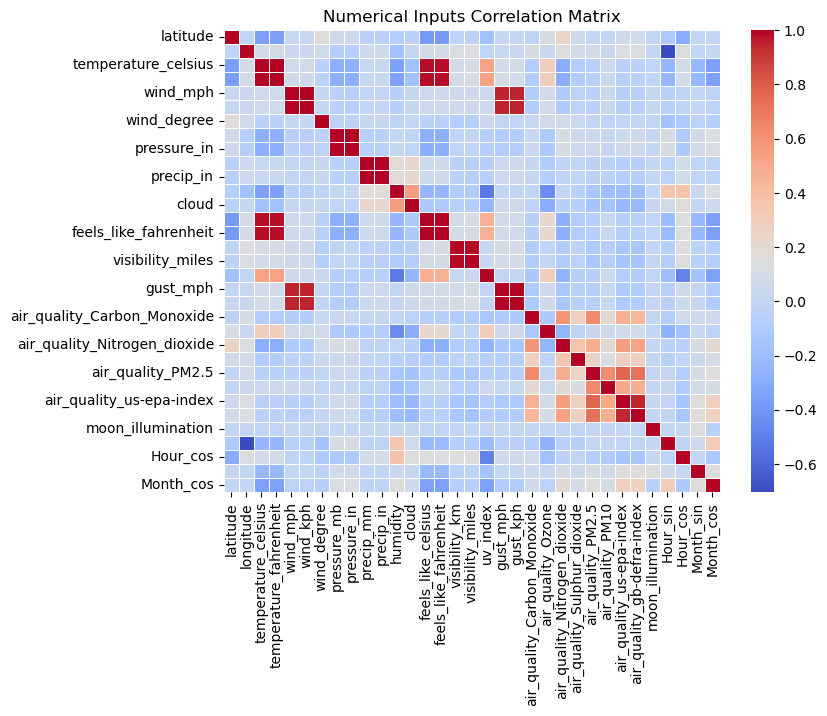

In [99]:
#Plotting Matrix

plt.figure(figsize=(8, 6))

sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title("Numerical Inputs Correlation Matrix")
plt.show()

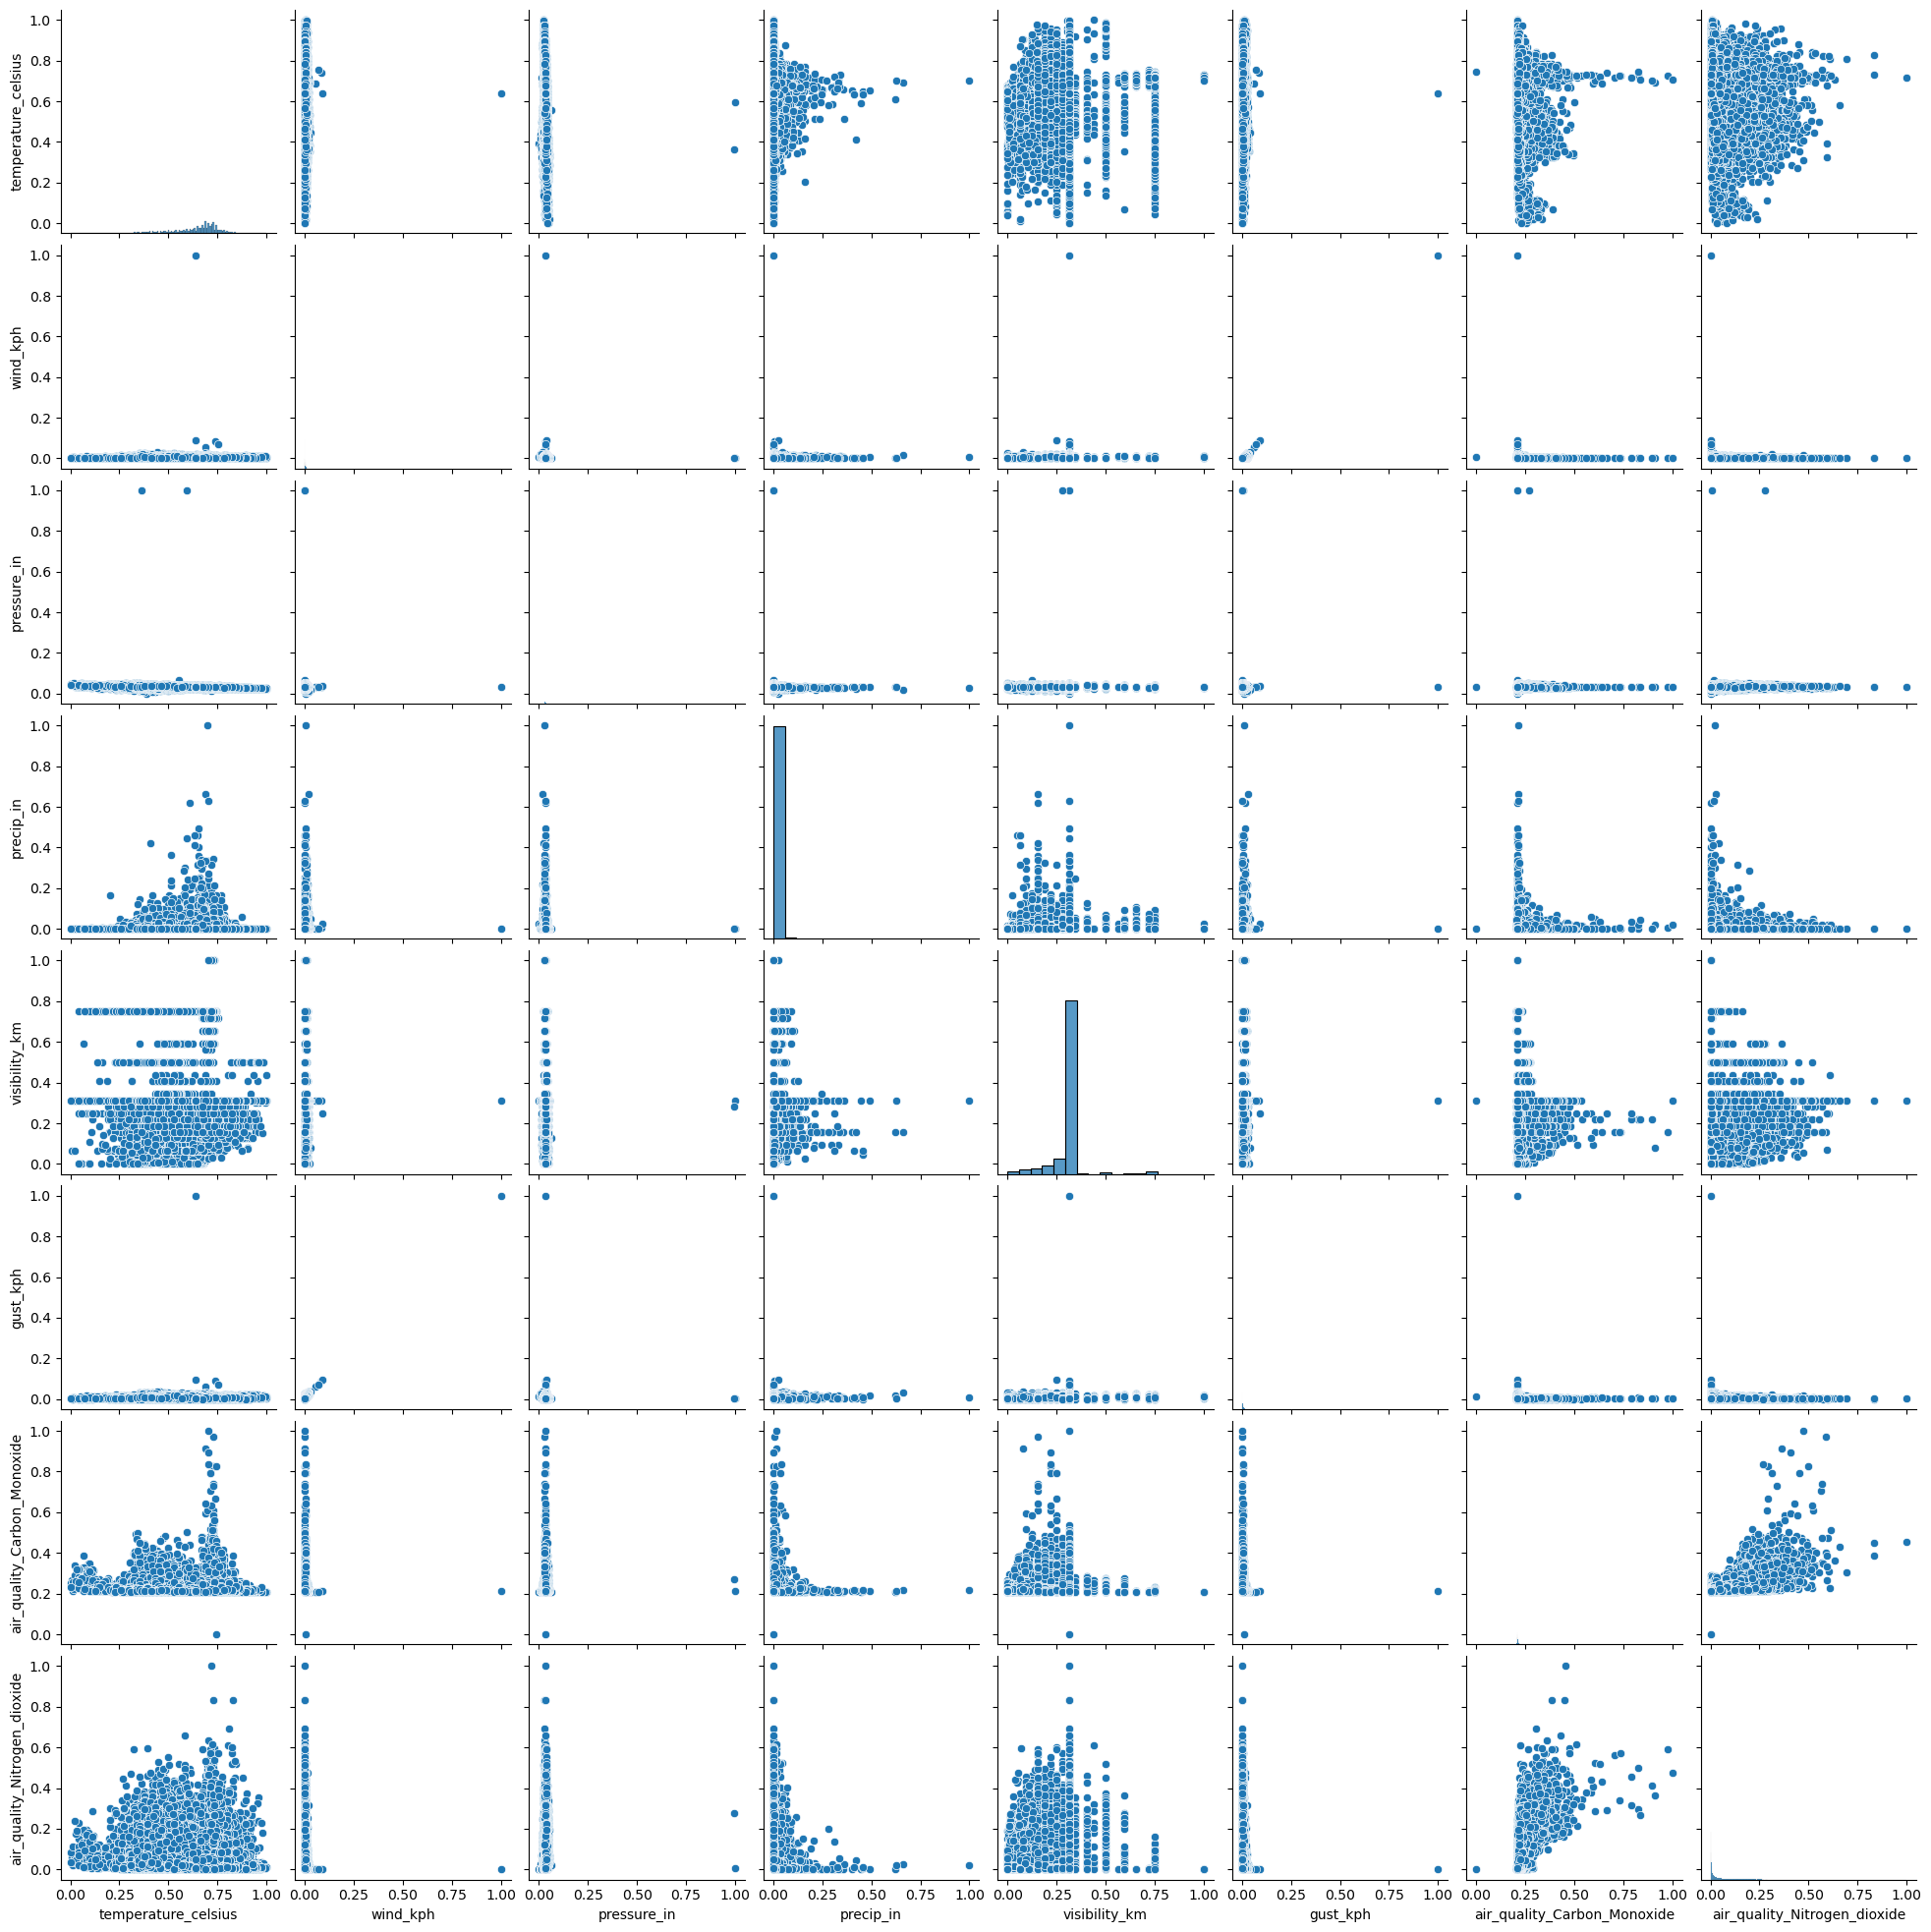

In [100]:
#Plotting some Interest Variables to get relations

sns.pairplot(df_scaled[['temperature_celsius','wind_kph','pressure_in','precip_in','visibility_km','gust_kph','air_quality_Carbon_Monoxide','air_quality_Nitrogen_dioxide']])

plt.show()

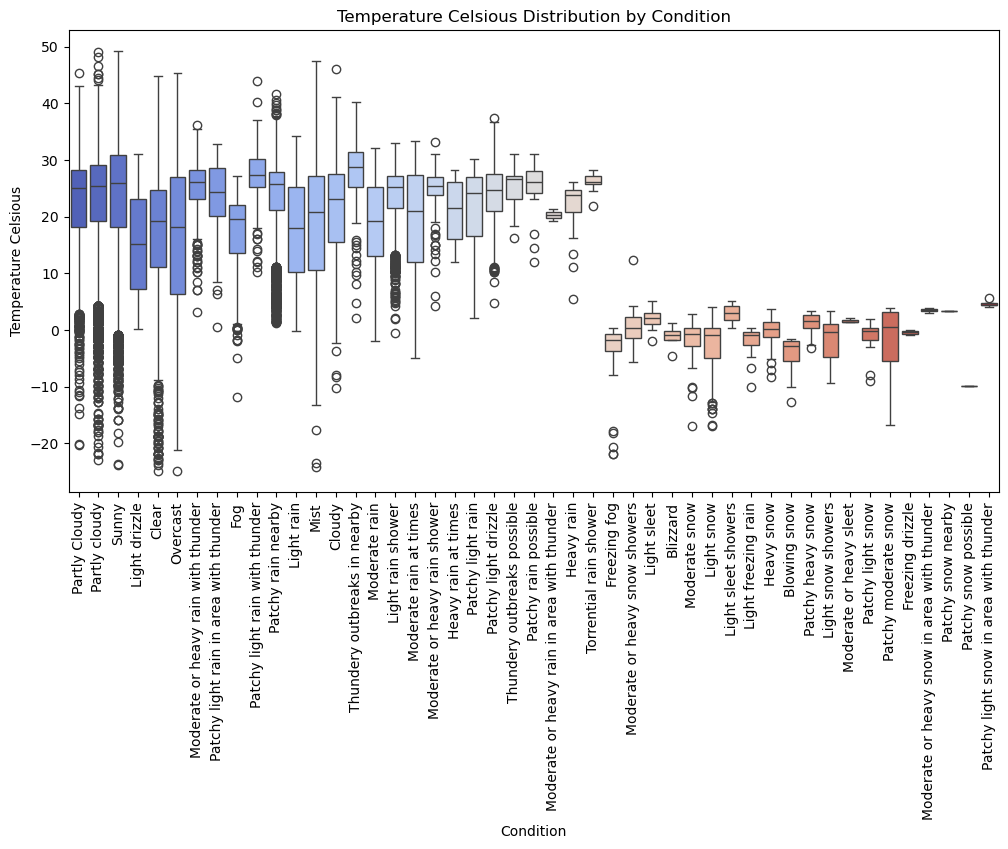

In [101]:
#Plotting boxplots for temperature and condition

plt.figure(figsize=(12, 6))
sns.boxplot(
    x=df['condition_text'], 
    y=df['temperature_celsius'], 
    hue=df['condition_text'],
    palette="coolwarm", 
    legend=False  
)

plt.xticks(rotation=90)
plt.xlabel("Condition")
plt.ylabel("Temperature Celsious")
plt.title("Temperature Celsious Distribution by Condition")
plt.show()

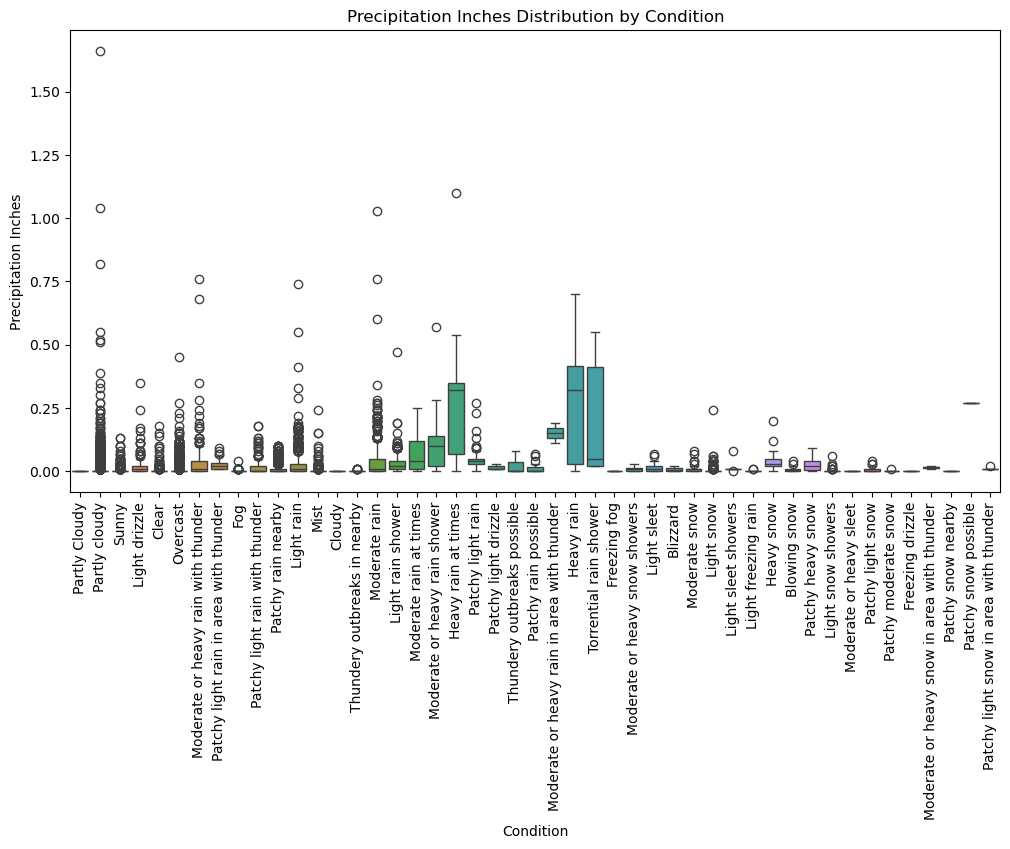

In [102]:
#Plotting boxplots for temperature and condition

plt.figure(figsize=(12, 6))

sns.boxplot(
    x=df['condition_text'], 
    y=df['precip_in'], 
    hue=df['condition_text'], 
    legend=False  
)

plt.xticks(rotation=90)
plt.xlabel("Condition")
plt.ylabel("Precipitation Inches")
plt.title("Precipitation Inches Distribution by Condition")
plt.show()

In [103]:
#Setting a location for prediction analysis

location='Tegucigalpa'
df_scaled_location= df_scaled[df_scaled['location_name']==location]
df_scaled_location= df_scaled_location.sort_values(by='last_updated')
df_scaled_location

,country,location_name,timezone,last_updated,condition_text,wind_direction,sunrise,sunset,moonrise,moonset,...,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,moon_illumination,Hour_sin,Hour_cos,Month_sin,Month_cos
74,Honduras,Tegucigalpa,America/Tegucigalpa,2024-05-16 02:45:00,Partly cloudy,WSW,5,18,12.0,0.0,...,0.950579,0.011658,0.237583,0.2,0.111111,0.55,0.750000,0.933013,0.75,0.066987
269,Honduras,Tegucigalpa,America/Tegucigalpa,2024-05-16 08:00:00,Partly cloudy,NNE,5,18,12.0,0.0,...,0.950541,0.011658,0.238103,0.2,0.111111,0.55,0.933013,0.250000,0.75,0.066987
464,Honduras,Tegucigalpa,America/Tegucigalpa,2024-05-17 10:00:00,Partly cloudy,NNW,5,18,13.0,1.0,...,0.950617,0.001372,0.234844,0.0,0.000000,0.64,0.750000,0.066987,0.75,0.066987
656,Honduras,Tegucigalpa,America/Tegucigalpa,2024-05-18 08:30:00,Partly cloudy,N,5,18,14.0,2.0,...,0.950788,0.004223,0.235884,0.0,0.000000,0.73,0.933013,0.250000,0.75,0.066987
850,Honduras,Tegucigalpa,America/Tegucigalpa,2024-05-19 08:15:00,Overcast,N,5,18,15.0,2.0,...,0.950569,0.010481,0.237469,0.2,0.111111,0.81,0.933013,0.250000,0.75,0.066987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58732,Honduras,Tegucigalpa,America/Tegucigalpa,2025-03-15 03:45:00,Partly cloudy,SSW,5,17,19.0,6.0,...,0.951993,0.013641,0.237284,0.2,0.111111,0.99,0.853553,0.853553,1.00,0.500000
58927,Honduras,Tegucigalpa,America/Tegucigalpa,2025-03-16 03:45:00,Clear,SSW,5,17,20.0,7.0,...,0.952239,0.015131,0.237636,0.2,0.222222,0.96,0.853553,0.853553,1.00,0.500000
59122,Honduras,Tegucigalpa,America/Tegucigalpa,2025-03-17 03:45:00,Partly cloudy,N,5,18,20.0,7.0,...,0.951360,0.018914,0.238387,0.2,0.222222,0.92,0.853553,0.853553,1.00,0.500000
59317,Honduras,Tegucigalpa,America/Tegucigalpa,2025-03-18 03:45:00,Partly cloudy,N,5,18,21.0,8.0,...,0.950674,0.006648,0.235923,0.0,0.000000,0.86,0.853553,0.853553,1.00,0.500000


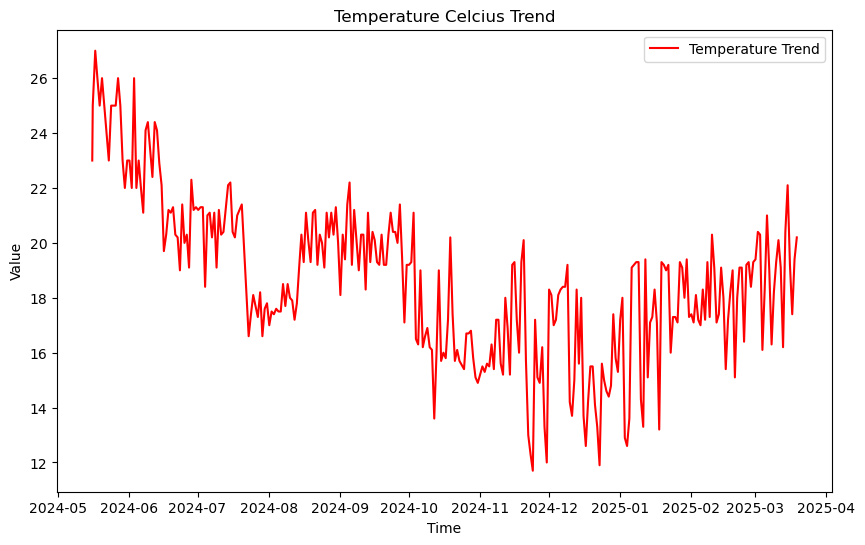

In [104]:
#Plotting Temperature trend for Location

plt.figure(figsize=(10,6))
plt.plot(df_scaled_location['last_updated'],scaler.inverse_transform(df_scaled_location[columns])[:,columns.index("temperature_celsius")], label="Temperature Trend", color="red")
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Temperature Celcius Trend")
plt.legend()
plt.show()

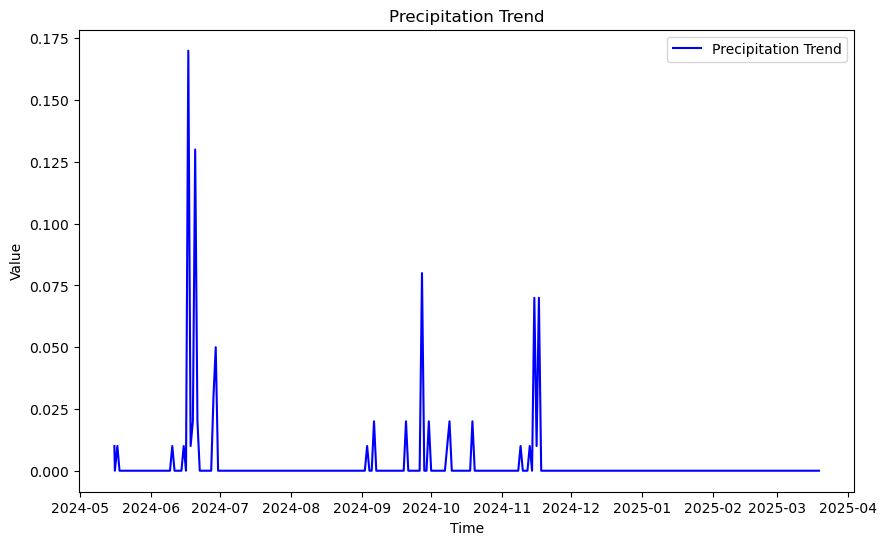

In [105]:
#Plotting Precipitation trend for Location

plt.figure(figsize=(10,6))
plt.plot(df_scaled_location['last_updated'],scaler.inverse_transform(df_scaled_location[columns])[:,columns.index("precip_in")], label="Precipitation Trend", color="blue")
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Precipitation Trend")
plt.legend()
plt.show()

In [106]:
# Method to create sequences for LSTM Model

def create_sequences(data, time_steps=5):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps])
        y.append(data[i+time_steps])
    return np.array(X), np.array(y)

In [107]:
columns

['latitude',
 'longitude',
 'temperature_celsius',
 'temperature_fahrenheit',
 'wind_mph',
 'wind_kph',
 'wind_degree',
 'pressure_mb',
 'pressure_in',
 'precip_mm',
 'precip_in',
 'humidity',
 'cloud',
 'feels_like_celsius',
 'feels_like_fahrenheit',
 'visibility_km',
 'visibility_miles',
 'uv_index',
 'gust_mph',
 'gust_kph',
 'air_quality_Carbon_Monoxide',
 'air_quality_Ozone',
 'air_quality_Nitrogen_dioxide',
 'air_quality_Sulphur_dioxide',
 'air_quality_PM2.5',
 'air_quality_PM10',
 'air_quality_us-epa-index',
 'air_quality_gb-defra-index',
 'moon_illumination',
 'Hour_sin',
 'Hour_cos',
 'Month_sin',
 'Month_cos']

In [108]:
#Creating sequences for LSTM
X, y = create_sequences(df_scaled_location[columns].to_numpy())

#Spliting data in training and validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [109]:
#creating model structure
model = Sequential()
model.add(LSTM(units=248, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(units=128))
model.add(Dense(units=64))
model.add(Dense(units=len(columns)))

In [110]:
model.compile(optimizer='adam', loss='mean_squared_error')

#Repeating the dataset to improve training
train_ds = tf.data.Dataset.from_tensor_slices(
    (X_train, y_train)).shuffle(len(X_train)).repeat().batch(32)
test_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(32)

# Train the model
history = model.fit(train_ds, epochs=20, batch_size=32, validation_data=(X_test, y_test), steps_per_epoch=500)

Epoch 1/20
500/500 [==============================] - 5s 7ms/step - loss: 0.0098 - val_loss: 0.0093
Epoch 2/20
500/500 [==============================] - 3s 7ms/step - loss: 0.0066 - val_loss: 0.0098
Epoch 3/20
500/500 [==============================] - 3s 7ms/step - loss: 0.0055 - val_loss: 0.0117
Epoch 4/20
500/500 [==============================] - 3s 7ms/step - loss: 0.0037 - val_loss: 0.0172
Epoch 5/20
500/500 [==============================] - 3s 7ms/step - loss: 0.0019 - val_loss: 0.0223
Epoch 6/20
500/500 [==============================] - 3s 7ms/step - loss: 0.0010 - val_loss: 0.0342
Epoch 7/20
500/500 [==============================] - 4s 7ms/step - loss: 5.8044e-04 - val_loss: 0.0347
Epoch 8/20
500/500 [==============================] - 3s 7ms/step - loss: 3.7057e-04 - val_loss: 0.0320
Epoch 9/20
500/500 [==============================] - 3s 7ms/step - loss: 2.8877e-04 - val_loss: 0.0318
Epoch 10/20
500/500 [==============================] - 3s 7ms/step - loss: 2.5178e-04 - 

In [111]:
#Predicting Fit Values
train_predictions = model.predict(X_train)

# Reverse scaling to get back original values
train_predictions_rescaled = scaler.inverse_transform(train_predictions)
y_train_rescaled = scaler.inverse_transform(y_train)

# Calculate metrics
mse_train = mean_squared_error(y_train_rescaled, train_predictions_rescaled)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train_rescaled, train_predictions_rescaled)

# Print results
print(f"Train Mean Squared Error (MSE): {mse_train:.4f}")
print(f"Train Root Mean Squared Error (RMSE): {rmse_train:.4f}")
print(f"Train Mean Absolute Error (MAE): {mae_train:.4f}")

8/8 [==============================] - 0s 3ms/step
Train Mean Squared Error (MSE): 2123.6985
Train Root Mean Squared Error (RMSE): 46.0836
Train Mean Absolute Error (MAE): 10.6721


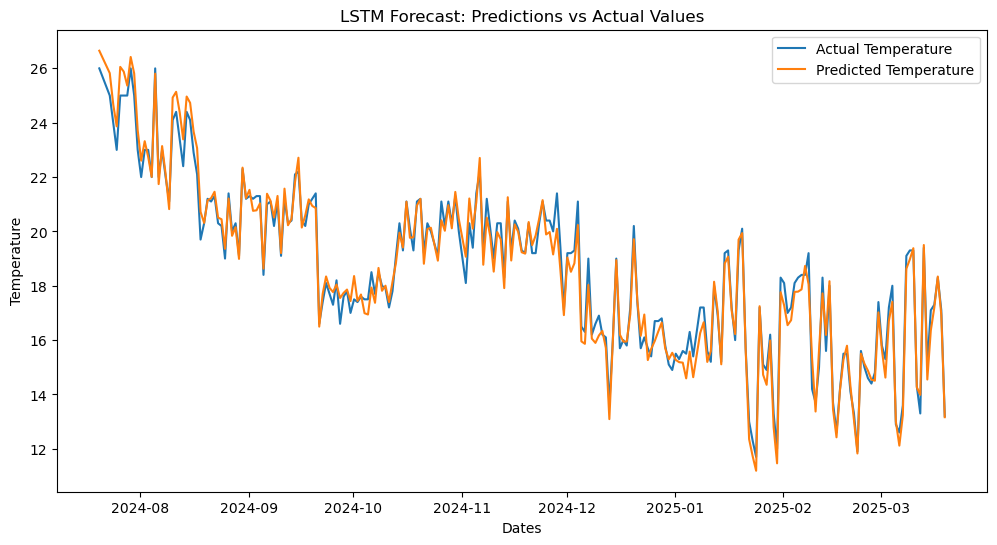

In [112]:
#Plot Fit vs Actual for temperature
plt.figure(figsize=(12,6))
plt.plot(df_scaled_location['last_updated'][-len(y_train_rescaled):], y_train_rescaled[:, 2], label="Actual Temperature")
plt.plot(df_scaled_location['last_updated'][-len(train_predictions_rescaled):], train_predictions_rescaled[:, 2], label="Predicted Temperature")
plt.xlabel("Dates")
plt.ylabel("Temperature")
plt.title("LSTM Forecast: Predictions vs Actual Values")
plt.legend()
plt.show()

In [113]:
#Predicting Test Values

test_predictions = model.predict(X_test)

# Reverse scaling to get back original values
test_predictions_rescaled = scaler.inverse_transform(test_predictions)
y_test_rescaled = scaler.inverse_transform(y_test)

# Calculate metrics
mse_test = mean_squared_error(y_test_rescaled, test_predictions_rescaled)
rmse_test = np.sqrt(mse_train)
mae_test = mean_absolute_error(y_test_rescaled, test_predictions_rescaled)
r2_test = r2_score(y_test_rescaled, test_predictions_rescaled)

# Print results
print(f"Test Mean Squared Error (MSE): {mse_test:.4f}")
print(f"Test Root Mean Squared Error (RMSE): {rmse_test:.4f}")
print(f"Test Mean Absolute Error (MAE): {mae_test:.4f}")

2/2 [==============================] - 0s 3ms/step
Test Mean Squared Error (MSE): 9994.1729
Test Root Mean Squared Error (RMSE): 46.0836
Test Mean Absolute Error (MAE): 27.0934


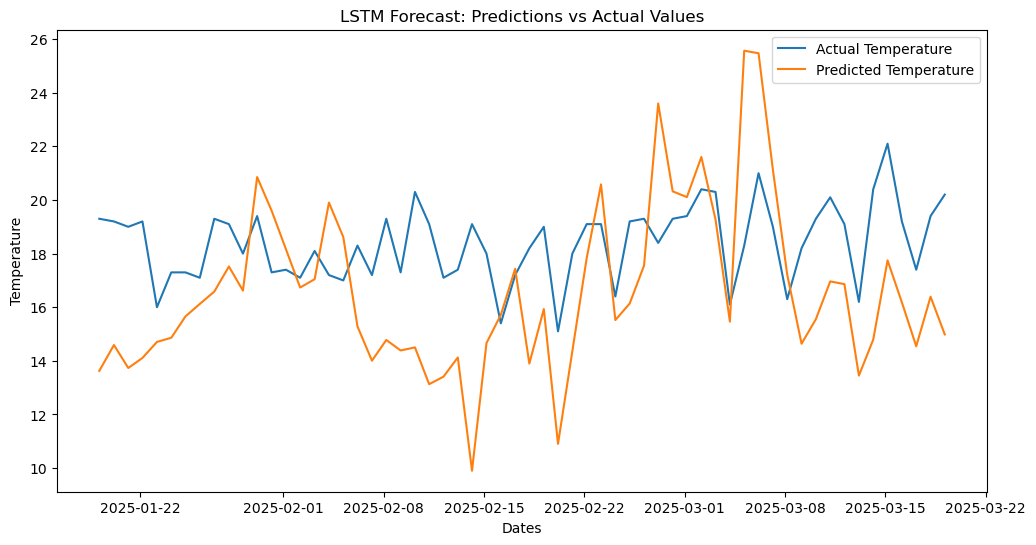

In [114]:
#Plot Predicted vs Actual for temperature

plt.figure(figsize=(12,6))
plt.plot(df_scaled_location['last_updated'][-len(y_test_rescaled):], y_test_rescaled[:, 2], label="Actual Temperature")
plt.plot(df_scaled_location['last_updated'][-len(test_predictions_rescaled):], test_predictions_rescaled[:, 2], label="Predicted Temperature")
plt.xlabel("Dates")
plt.ylabel("Temperature")
plt.title("LSTM Forecast: Predictions vs Actual Values")
plt.legend()
plt.show()

In [115]:
#Preparing data for Random Forest Model
X_flat = X.reshape((X.shape[0], X.shape[1] * X.shape[2]))

#Training and test Split
X_train, X_test, y_train, y_test = train_test_split(X_flat, y, test_size=0.2, shuffle=False)

#Model Fit
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(X_train, y_train)

#Prediction Fit
rf_train_preds = rf_model.predict(X_train)

# Reverse scaling to get back original values
rf_train_preds_rescaled = scaler.inverse_transform(rf_train_preds)
rfy_train_rescaled = scaler.inverse_transform(y_train)

#Prediction Test
rf_test_preds = rf_model.predict(X_test)

# Reverse scaling to get back original values
rf_test_preds_rescaled = scaler.inverse_transform(rf_test_preds)
rfy_test_rescaled = scaler.inverse_transform(y_test)

In [116]:
# Error Measures
mse_train_rf = mean_squared_error(rfy_train_rescaled, rf_train_preds_rescaled)
rmse_train_rf = np.sqrt(mse_train_rf)
train_mae_rf = mean_absolute_error(rfy_train_rescaled, rf_train_preds_rescaled)
mse_test_rf = mean_squared_error(rfy_test_rescaled, rf_test_preds_rescaled)
rmse_test_rf = np.sqrt(mse_test_rf)
test_mae_rf = mean_absolute_error(rfy_test_rescaled, rf_test_preds_rescaled)

print(f"Random Forest Train MSE: {mse_train_rf:.4f}")
print(f"Random Forest Train RMSE: {rmse_train_rf:.4f}")
print(f"Random Forest Train MAE: {train_mae_rf:.4f}")
print(f"Random Forest Test MSE: {mse_test_rf:.4f}")
print(f"Random Forest Test RMSE: {rmse_test_rf:.4f}")
print(f"Random Forest Test MAE: {test_mae_rf:.4f}")

Random Forest Train MSE: 180.2566
Random Forest Train RMSE: 13.4260
Random Forest Train MAE: 3.1285
Random Forest Test MSE: 2546.3584
Random Forest Test RMSE: 50.4615
Random Forest Test MAE: 7.6404


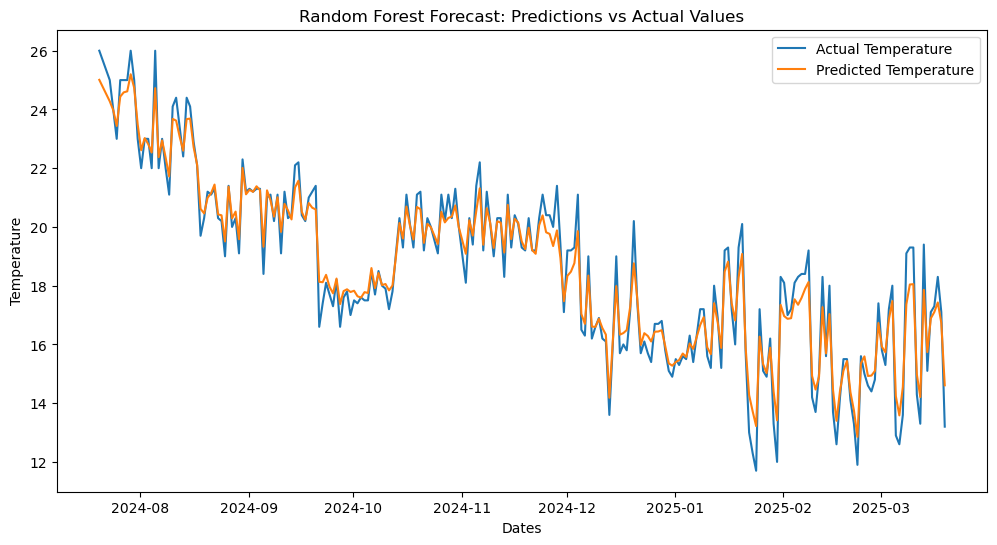

In [117]:
# Plotting Prediction of fit values vs actual values
plt.figure(figsize=(12,6))
plt.plot(df_scaled_location['last_updated'][-len(rfy_train_rescaled):], rfy_train_rescaled[:, 2], label="Actual Temperature")
plt.plot(df_scaled_location['last_updated'][-len(rf_train_preds_rescaled):], rf_train_preds_rescaled[:, 2], label="Predicted Temperature")
plt.xlabel("Dates")
plt.ylabel("Temperature")
plt.title("Random Forest Forecast: Predictions vs Actual Values")
plt.legend()
plt.show()

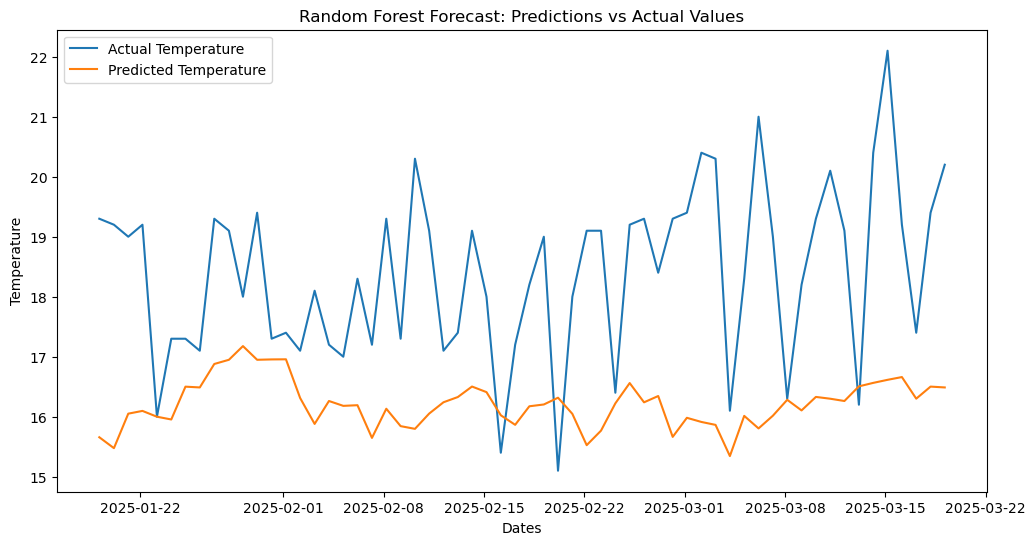

In [118]:
# Plotting Prediction of test values vs actual values
plt.figure(figsize=(12,6))
plt.plot(df_scaled_location['last_updated'][-len(rfy_test_rescaled):], rfy_test_rescaled[:, 2], label="Actual Temperature")
plt.plot(df_scaled_location['last_updated'][-len(rf_test_preds_rescaled):], rf_test_preds_rescaled[:, 2], label="Predicted Temperature")
plt.xlabel("Dates")
plt.ylabel("Temperature")
plt.title("Random Forest Forecast: Predictions vs Actual Values")
plt.legend()
plt.show()

In [119]:
# Training an Ensemble of models stacking them

X_train_stack = np.column_stack((train_predictions, rf_train_preds))
X_test_stack = np.column_stack((test_predictions, rf_test_preds))

#Using Linear Regresion as Meta Model to combine predictions
meta_model = LinearRegression()
meta_model.fit(X_train_stack, y_train)

# Predict using the stacked model
stacked_train_preds = meta_model.predict(X_train_stack)
stacked_test_preds = meta_model.predict(X_test_stack)

# Reverse scaling to get back original values
stacked_train_preds_rescaled = scaler.inverse_transform(stacked_train_preds)
stacked_test_preds_rescaled = scaler.inverse_transform(stacked_test_preds)

# Evaluate the performance of the stacked model
train_mse = mean_squared_error(rfy_train_rescaled, stacked_train_preds_rescaled)
train_rmse = np.sqrt(mse_train_rf)
train_mae = mean_absolute_error(rfy_train_rescaled, stacked_train_preds_rescaled)
test_mse = mean_squared_error(rfy_test_rescaled, stacked_test_preds_rescaled)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(rfy_test_rescaled, stacked_test_preds_rescaled)

print(f"Stacked Model Train MSE: {train_mse:.4f}")
print(f"Stacked Model Train RMSE: {train_rmse:.4f}")
print(f"Stacked Model Train MAE: {train_mae:.4f}")
print(f"Stacked Model Test MSE: {test_mse:.4f}")
print(f"Stacked Model Test RMSE: {test_rmse:.4f}")
print(f"Stacked Model Test MAE: {test_mae:.4f}")

Stacked Model Train MSE: 12.0265
Stacked Model Train RMSE: 13.4260
Stacked Model Train MAE: 0.8396
Stacked Model Test MSE: 4876.3571
Stacked Model Test RMSE: 69.8309
Stacked Model Test MAE: 16.1172


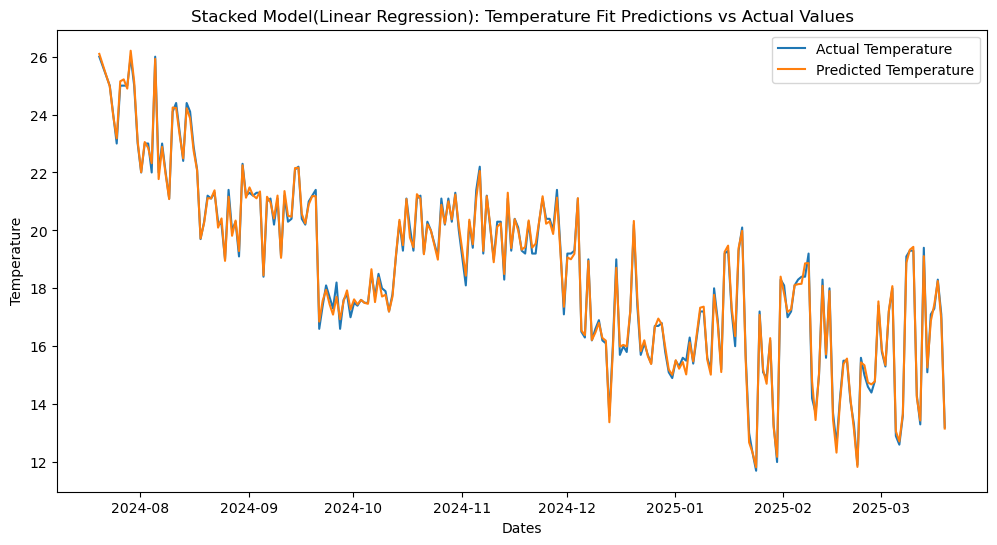

In [120]:
# Plotting Prediction of fit values vs actual values
plt.figure(figsize=(12,6))
plt.plot(df_scaled_location['last_updated'][-len(rfy_train_rescaled):], rfy_train_rescaled[:, 2], label="Actual Temperature")
plt.plot(df_scaled_location['last_updated'][-len(stacked_train_preds_rescaled):], stacked_train_preds_rescaled[:, 2], label="Predicted Temperature")
plt.xlabel("Dates")
plt.ylabel("Temperature")
plt.title("Stacked Model(Linear Regression): Temperature Fit Predictions vs Actual Values")
plt.legend()
plt.show()

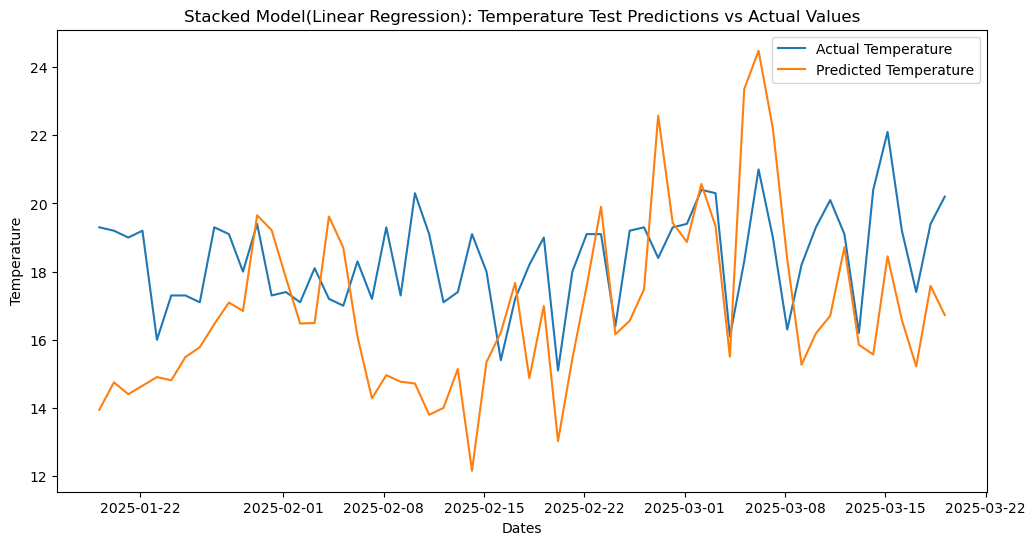

In [121]:
# Plotting Prediction of test values vs actual values
plt.figure(figsize=(12,6))
plt.plot(df_scaled_location['last_updated'][-len(rfy_test_rescaled):], rfy_test_rescaled[:, 2], label="Actual Temperature")
plt.plot(df_scaled_location['last_updated'][-len(stacked_test_preds_rescaled):], stacked_test_preds_rescaled[:, 2], label="Predicted Temperature")
plt.xlabel("Dates")
plt.ylabel("Temperature")
plt.title("Stacked Model(Linear Regression): Temperature Test Predictions vs Actual Values")
plt.legend()
plt.show()

In [122]:
# Training an Ensemble of models stacking them

X_train_stack = np.column_stack((train_predictions, rf_train_preds))
X_test_stack = np.column_stack((test_predictions, rf_test_preds))

#Using RandomForest as Meta Model to combine predictions
meta_model = RandomForestRegressor(n_estimators=50)
meta_model.fit(X_train_stack, y_train)

# Predict using the stacked model
stacked_train_preds = meta_model.predict(X_train_stack)
stacked_test_preds = meta_model.predict(X_test_stack)

# Reverse scaling to get back original values
stacked_train_preds_rescaled = scaler.inverse_transform(stacked_train_preds)
stacked_test_preds_rescaled = scaler.inverse_transform(stacked_test_preds)

# Evaluate the performance of the stacked model
train_mse = mean_squared_error(rfy_train_rescaled, stacked_train_preds_rescaled)
train_rmse = np.sqrt(mse_train_rf)
train_mae = mean_absolute_error(rfy_train_rescaled, stacked_train_preds_rescaled)
test_mse = mean_squared_error(rfy_test_rescaled, stacked_test_preds_rescaled)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(rfy_test_rescaled, stacked_test_preds_rescaled)

print(f"Stacked Model Train MSE: {train_mse:.4f}")
print(f"Stacked Model Train RMSE: {train_rmse:.4f}")
print(f"Stacked Model Train MAE: {train_mae:.4f}")
print(f"Stacked Model Test MSE: {test_mse:.4f}")
print(f"Stacked Model Test RMSE: {test_rmse:.4f}")
print(f"Stacked Model Test MAE: {test_mae:.4f}")

Stacked Model Train MSE: 96.3552
Stacked Model Train RMSE: 13.4260
Stacked Model Train MAE: 1.9234
Stacked Model Test MSE: 2875.4155
Stacked Model Test RMSE: 53.6229
Stacked Model Test MAE: 8.3273


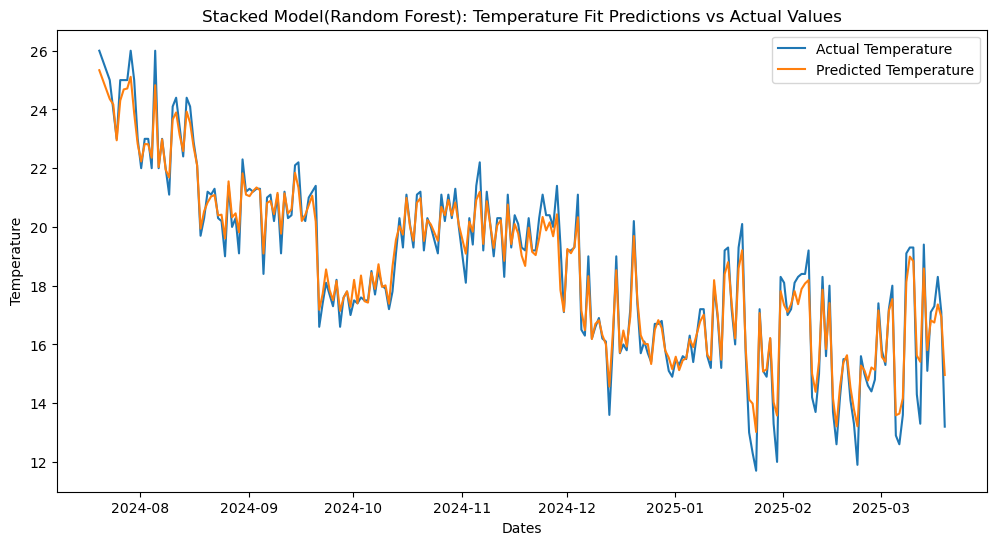

In [123]:
# Plotting Prediction of fit values vs actual values
plt.figure(figsize=(12,6))
plt.plot(df_scaled_location['last_updated'][-len(rfy_train_rescaled):], rfy_train_rescaled[:, 2], label="Actual Temperature")
plt.plot(df_scaled_location['last_updated'][-len(stacked_train_preds_rescaled):], stacked_train_preds_rescaled[:, 2], label="Predicted Temperature")
plt.xlabel("Dates")
plt.ylabel("Temperature")
plt.title("Stacked Model(Random Forest): Temperature Fit Predictions vs Actual Values")
plt.legend()
plt.show()

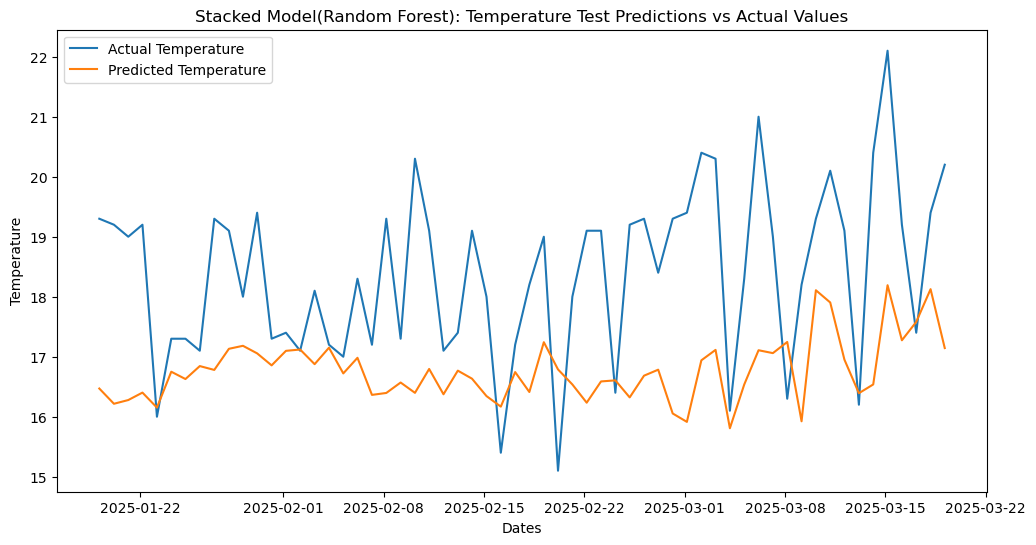

In [124]:
# Plotting Prediction of test values vs actual values
plt.figure(figsize=(12,6))
plt.plot(df_scaled_location['last_updated'][-len(rfy_test_rescaled):], rfy_test_rescaled[:, 2], label="Actual Temperature")
plt.plot(df_scaled_location['last_updated'][-len(stacked_test_preds_rescaled):], stacked_test_preds_rescaled[:, 2], label="Predicted Temperature")
plt.xlabel("Dates")
plt.ylabel("Temperature")
plt.title("Stacked Model(Random Forest): Temperature Test Predictions vs Actual Values")
plt.legend()
plt.show()

In [125]:
# In this case cause the features were duplicated cause we have the predicted values for the lstm model and the random regression model
# Creating new_columns with both models features 
new_columns = columns + [column + "_rf" for column in columns]

In [126]:
#Variable importance

feature_importance = meta_model.feature_importances_
feature_names = new_columns

# Create a DataFrame
importance_df = pd.DataFrame({"Feature": feature_names, "Importance": feature_importance})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

# Display importance
importance_df.style

,Feature,Importance
28,moon_illumination,0.123431
65,Month_cos_rf,0.115752
39,wind_degree_rf,0.114702
6,wind_degree,0.104092
34,longitude_rf,0.055709
50,uv_index_rf,0.050834
61,moon_illumination_rf,0.048257
17,uv_index,0.039330
30,Hour_cos,0.035715
63,Hour_cos_rf,0.025556


 93%|=================== | 1851/1980 [00:11<00:00]       

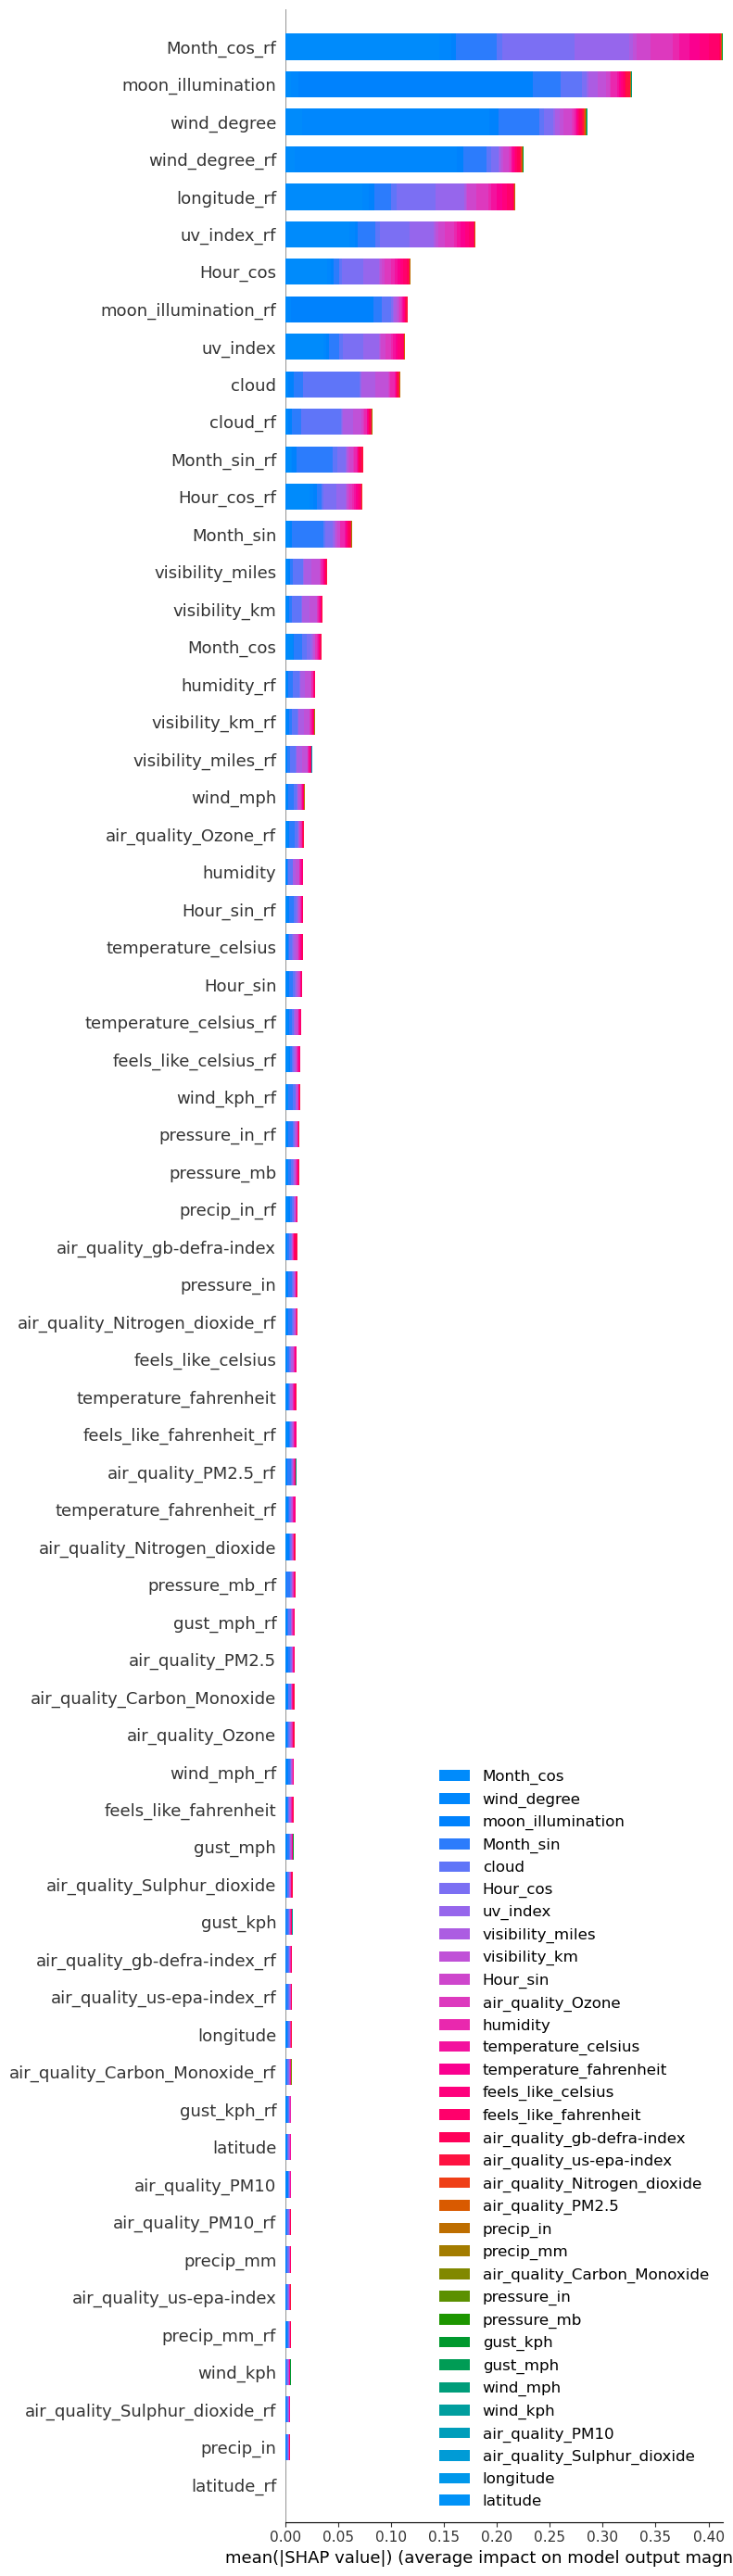

In [127]:
#Variable importance using SHAP
explainer = shap.Explainer(meta_model, X_train_stack)
shap_values = explainer(X_test_stack,check_additivity=False)
shap.summary_plot(shap_values, X_test_stack, new_columns, class_names=columns, max_display=X_test_stack.shape[1])